# Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data-series.csv')

In [ ]:
df.head()

,Date,Time,Appliance,Energy_Consumption,Room,Status
0,2022-01-01,00:00,Refrigerator,1.2,Kitchen,On
1,2022-01-01,01:00,Refrigerator,1.2,Kitchen,On
2,2022-01-01,02:00,Refrigerator,1.2,Kitchen,On
3,2022-01-01,03:00,Refrigerator,1.2,Kitchen,On
4,2022-01-01,04:00,Refrigerator,1.2,Kitchen,On


In [ ]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [ ]:
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.dayofweek

In [ ]:
df = df.drop(columns=['Date', 'Time', 'Datetime'])

In [ ]:
df.isnull().sum()

,0
Appliance,0
Energy_Consumption,0
Room,0
Status,0
Hour,0
Day,0


In [ ]:
X = df.drop(columns=['Energy_Consumption'])
y = df['Energy_Consumption']

In [ ]:
# Define the ColumnTransformer to apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('room_status', OneHotEncoder(), ['Room', 'Status']),
        ('num', 'passthrough', ['Hour', 'Day'])
    ]
)

In [ ]:
# Create a pipeline with preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('room_status',
                                                  OneHotEncoder(),
                                                  ['Room', 'Status']),
                                                 ('num', 'passthrough',
                                                  ['Hour', 'Day'])])),
                ('regressor', LinearRegression())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 7.764123984005867e-27
Root Mean Squared Error: 8.811426663149316e-14


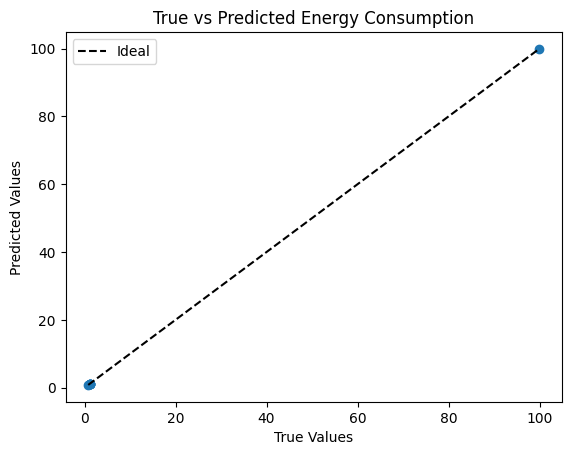

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Energy Consumption')

max_value = max(y_test.max(), y_pred.max())
min_value = min(y_test.min(), y_pred.min())
plt.plot([min_value, max_value], [min_value, max_value], 'k--', label='Ideal')

plt.legend()
plt.show()

In [ ]:
import joblib

joblib.dump(pipeline, 'energy_consumption_model.pkl')

['energy_consumption_model.pkl']

# Predict

In [ ]:
model = joblib.load('energy_consumption_model.pkl')

# Example data
input_data = pd.DataFrame({
    'Appliance': ['Refrigerator'],
    'Room': ['Kitchen'],
    'Status': ['On'],
    'Hour': [15],
    'Day': [6]
})

predicted_energy = model.predict(input_data)

print("Predicted Energy Consumption:", predicted_energy[0])

Predicted Energy Consumption: 1.1999999999999318
